# Exploratary Data Analysis : Sports 
## The Sparks Foundation

- The dataset consist of data about IPL matches played from the year 2008 to 2019. IPL is a professional Twenty20 cricket league founded by the Board of Control for Cricket in India (BCCI) in 2008. The league has 8 teams representing 8 different Indian cities or states. It enjoys tremendous popularity and the brand value of the IPL in 2019 was estimated to be ₹475 billion. So let’s analyze IPL through stats.

## Objective:
- Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’
- As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team. 
- Suggest teams or players a company should endorse for its products.


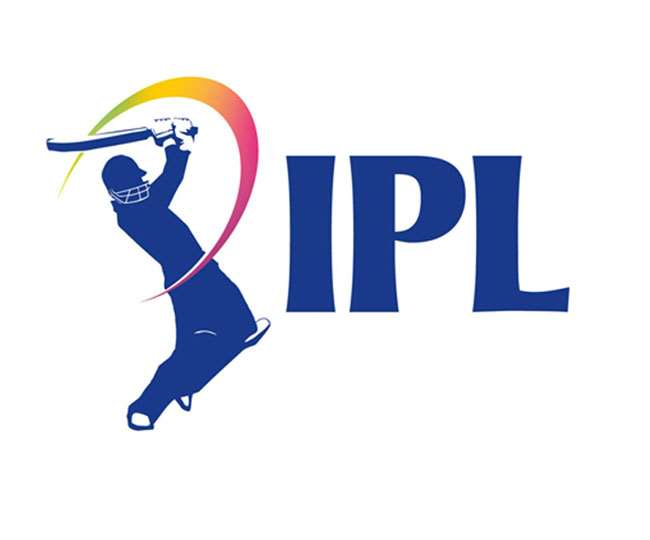

In [54]:
#import libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

#Pandas library is a data analysis tool used for data manipulation
#Numpy for scientific computing 
#and Matplotlib & Seaborn for data visualization.

In [55]:
#laod the given matches.csv file first
matches = pd.read_csv("matches.csv")

In [56]:
#check the content of the file 
matches.head() #prints first 5 elements

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [57]:
#check the shape of the file
matches.shape

(756, 18)

In [58]:
#check the columns and non-null Values 
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [59]:
#set date as datetime
matches["date"] = pd.to_datetime(matches["date"])

#set Categorical data
matches['season'] = matches['season'].astype('category')
matches['dl_applied'] = matches['dl_applied'].astype('category')


In [60]:
#check the null values in the columns
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

#### There are very few null values in other columns compared to the "umpire3"
#### you can drop the "umpire3" column to reduce the error in EDA

In [61]:
#drop the umpire3 column
matches = matches.drop(columns = ["umpire3"],axis = 1)

In [62]:
matches.describe()

,id,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000
mean,1792.178571,13.283069,3.350529
std,3464.478148,23.471144,3.387963
min,1.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000
50%,378.500000,0.000000,4.000000
75%,567.250000,19.000000,6.000000
max,11415.000000,146.000000,10.000000


### Till now we have droped the null values from data 
### Following are the inferences can be made from the above processes:
- The .csv file has data of IPL matches starting from the season 2008 to 2019.
- There were 756 IPL matches hosted from 2008 to 2019.
- The biggest margin of victory for the team batting first(win_by_runs) is 146 runs.
- The biggest victory of the team batting second(win_by_wickets) is by 10 wickets.
- 75% of the victorious teams that bat first won by a margin of 19 runs.
- 75% of the victorious teams that bat second won by a margin of 6 wickets.


In [63]:
#check the column name and their meaning
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')

In [64]:
#check the unique terms in each columns
for col in matches:
    print(matches[col].unique())

[    1     2     3     4     5     6     7     8     9    10    11    12
    13    14    15    16    17    18    19    20    21    22    23    24
    25    26    27    28    29    30    31    32    33    34    35    36
    37    38    39    40    41    42    43    44    45    46    47    48
    49    50    51    52    53    54    55    56    57    58    59    60
    61    62    63    64    65    66    67    68    69    70    71    72
    73    74    75    76    77    78    79    80    81    82    83    84
    85    86    87    88    89    90    91    92    93    94    95    96
    97    98    99   100   101   102   103   104   105   106   107   108
   109   110   111   112   113   114   115   116   117   118   119   120
   121   122   123   124   125   126   127   128   129   130   131   132
   133   134   135   136   137   138   139   140   141   142   143   144
   145   146   147   148   149   150   151   152   153   154   155   156
   157   158   159   160   161   162   163   164   

### There are total 18 columns:
- **id**: The IPL match id.
- **season**: The IPL season
- **city**: The city where the IPL match was held.
- **date**: The date on which the match was held.
- **team1**: One of the teams of the IPL match
- **team2**: The other team of the IPL match
- **toss_winner**: The team that won the toss
- **toss_decision**: The decision taken by the team that won the toss to ‘bat’ or ‘field’
- **result**: The result(‘normal’, ‘tie’, ‘no result’) of the match.
- **dl_applied**: (1 or 0)indicates whether the Duckworth-Lewis rule was applied or not.
- **winner**: The winner of the match.
- **win_by_runs**: Provides the runs by which the team batting first won
- **win_by_runs**: Provides the number of wickets by which the team batting second won.
- **player_of_match**: The outstanding player of the match.
- **venue**: The venue where the match was hosted.
- **umpire1**: One of the two on-field umpires who officiate the match.
- **umpire2**: One of the two on-field umpires who officiate the match.
- **umpire3**: The off-field umpire who officiates the match

# Number of Matches per Season

In [65]:
#lets find out number of matches per season

num_matches_season = matches["season"].value_counts() 
num_matches_df = pd.DataFrame(columns = ["season","matches"])

for i in num_matches_season.iteritems():
    temp_df = pd.DataFrame({"season":[i[0]],"matches":[i[1]]})
    num_matches_df = num_matches_df.append(temp_df,ignore_index=True)
num_matches_df

,season,matches
0,2013,76
1,2012,74
2,2011,73
3,2019,60
4,2018,60
5,2016,60
6,2014,60
7,2010,60
8,2017,59
9,2015,59


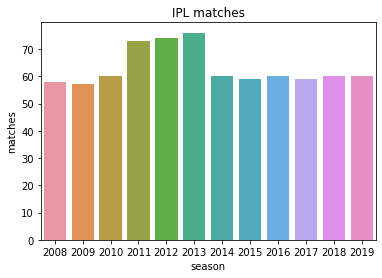

In [66]:
#lets visualize the number of matches per season

plt.title("IPL matches")
sns.barplot(x='season', y='matches', data=num_matches_df);

### We can infere from the plot that there were total 12 seasons played between (2008-2019) and most number of matches are played in season 6 (2013) with total 76 matches

# Number of matches hosted by different venues (top 15)

In [67]:
#venue that hosted maximum number of matches(top15)

Venue_matches = matches["venue"].value_counts()

Venue_matches_df = pd.DataFrame(columns = ["venue","matches"])
for i in Venue_matches.iteritems():
    temp_df = pd.DataFrame({"venue":[i[0]],"matches":[i[1]]})
    Venue_matches_df = Venue_matches_df.append(temp_df,ignore_index = True)
Venue_matches_df.head(15)

,venue,matches
0,Eden Gardens,77
1,Wankhede Stadium,73
2,M Chinnaswamy Stadium,73
3,Feroz Shah Kotla,67
4,"Rajiv Gandhi International Stadium, Uppal",56
5,"MA Chidambaram Stadium, Chepauk",49
6,Sawai Mansingh Stadium,47
7,"Punjab Cricket Association Stadium, Mohali",35
8,Maharashtra Cricket Association Stadium,21
9,Subrata Roy Sahara Stadium,17


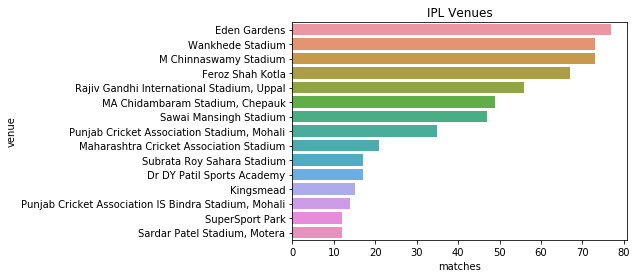

In [68]:
plt.title("IPL Venues")
sns.barplot(x = "matches",y="venue",data = Venue_matches_df.head(15))

### So the "Eden Garden Stadium" hosted maximum number of matches with total 77 matches.

# Number of matches won (all season)

In [69]:
#number of matches won 

Team_wins = matches["winner"].value_counts()

Team_wins_df = pd.DataFrame(columns = ["team","wins"])
for i in Team_wins.iteritems():
    temp_df = pd.DataFrame({"team":[i[0]],"wins":[i[1]]})
    Team_wins_df = Team_wins_df.append(temp_df,ignore_index = True)
print(Team_wins_df)

                           team wins
0                Mumbai Indians  109
1           Chennai Super Kings  100
2         Kolkata Knight Riders   92
3   Royal Challengers Bangalore   84
4               Kings XI Punjab   82
5              Rajasthan Royals   75
6              Delhi Daredevils   67
7           Sunrisers Hyderabad   58
8               Deccan Chargers   29
9                 Gujarat Lions   13
10                Pune Warriors   12
11               Delhi Capitals   10
12       Rising Pune Supergiant   10
13         Kochi Tuskers Kerala    6
14      Rising Pune Supergiants    5


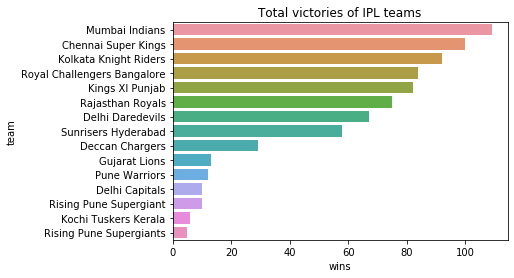

In [70]:
plt.title("Total victories of IPL teams")
sns.barplot(x = "wins",y = "team",data = Team_wins_df)

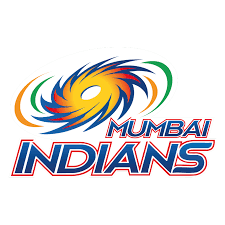

### we can see that Mumbai Indian won most number of matches i.e 109 matches
### so the top 8 teams are 
- Mumbai Indians
- Chennai Super Kings
- Kolkata Knight Riders
- Royal Challengers Banglore
- Kings XI Punjab
- Rajasthan Royals
- Delhi Daredevils
- Sunrisers Hyderabad

# Team Summary

In [71]:
# matches Played 
team_summary = pd.DataFrame(columns = [])
temp = []
for i in (matches.team1.value_counts() + matches.team2.value_counts()).iteritems():
    temp_df1 = pd.DataFrame({"team":[i[0]]})
    temp.append(i[1])
    team_summary = team_summary.append(temp_df1,ignore_index=True)
team_summary["matches_played"] = temp
#matches_won
win = []
for i in team_summary["team"]:
    win.append(matches[matches.winner == i].count()[0])
team_summary["win"] = win
team_summary["lose"] = team_summary["matches_played"] - team_summary["win"]
team_summary["success_percentage"] = (team_summary["win"]/team_summary["matches_played"])*100
team_summary

,team,matches_played,win,lose,success_percentage
0,Chennai Super Kings,164,100,64,60.975610
1,Deccan Chargers,75,29,46,38.666667
2,Delhi Capitals,16,10,6,62.500000
3,Delhi Daredevils,161,67,94,41.614907
4,Gujarat Lions,30,13,17,43.333333
5,Kings XI Punjab,176,82,94,46.590909
6,Kochi Tuskers Kerala,14,6,8,42.857143
7,Kolkata Knight Riders,178,92,86,51.685393
8,Mumbai Indians,187,109,78,58.288770
9,Pune Warriors,46,12,34,26.086957


In [72]:
summary_plot = pd.DataFrame(columns = [])
for i in range(0,2):
    temp = []
    for j in team_summary["team"].head(10):
        temp_df = pd.DataFrame({"team":[j]})
        summary_plot = summary_plot.append(temp_df,ignore_index = True)
matches_played = []
for i in team_summary["matches_played"].head(10):
    matches_played.append(i)
win = []
for i in team_summary["win"].head(10):
    win.append(i)
value = matches_played + win
summary_plot["value"] = value
category1 = []
for i in range(0,10):
    category1.append("matches_played")
category2 = []
for i in range(0,10):
    category2.append("win")
category = category1 + category2
summary_plot["category"] = category

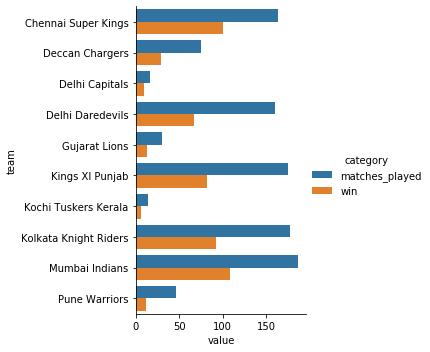

In [73]:
sns.catplot(x='value', y="team", hue='category', data=summary_plot, kind='bar')

## From the Team summary we can say the following things:

- Mumbai Indian Played highest number of matches(187) and won maximum number of matches i.e 109 with success percentage of 58.28
- Chennai Super Kings have highest success percentage(60.97) among the teams played more than 150 matches.

# Team with most number wins per season

In [74]:
#Teams with most wins per season
teamswin_season = matches.groupby("season")["winner"].value_counts()
year = 2008
teamswin_season_df = pd.DataFrame(columns = ["season","team","wins"])
for i in teamswin_season.iteritems():
    if i[0][0] == year:
        temp_df = pd.DataFrame({"season":[i[0][0]],"team":[i[0][1]],"wins":[i[1]]})
        teamswin_season_df = teamswin_season_df.append(temp_df)
        year += 1
teamswin_season_df

,season,team,wins
0,2008,Rajasthan Royals,13
0,2009,Delhi Daredevils,10
0,2010,Mumbai Indians,11
0,2011,Chennai Super Kings,11
0,2012,Kolkata Knight Riders,12
0,2013,Mumbai Indians,13
0,2014,Kings XI Punjab,12
0,2015,Chennai Super Kings,10
0,2016,Sunrisers Hyderabad,11
0,2017,Mumbai Indians,12


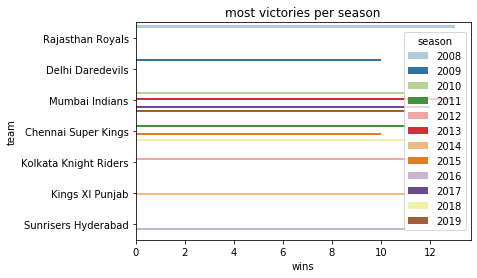

In [75]:
plt.title("most victories per season")
sns.barplot(x = "wins",y = "team", hue = "season",data = teamswin_season_df, palette = "Paired")

### Mumbai Indians has secured the most wins in four seasons(2010, 2013, 2017, and 2019).

# Number of Toss wins (all Season)

In [76]:
#toss wins per teams
toss_wins = matches["toss_winner"].value_counts()
toss_wins_df = pd.DataFrame(columns = ["team","toss_wins"])
for i in toss_wins.iteritems():
    temp_df = pd.DataFrame({"team":[i[0]],"toss_wins":[i[1]]})
    toss_wins_df = toss_wins_df.append(temp_df)
toss_wins_df

,team,toss_wins
0,Mumbai Indians,98
0,Kolkata Knight Riders,92
0,Chennai Super Kings,89
0,Kings XI Punjab,81
0,Royal Challengers Bangalore,81
0,Delhi Daredevils,80
0,Rajasthan Royals,80
0,Sunrisers Hyderabad,46
0,Deccan Chargers,43
0,Pune Warriors,20


In [77]:
#match_wins vs toss_wins
count1 = 0
count2 = 0
for i,v in matches.iterrows():
    if v["toss_winner"] == v["winner"]:
        count1 += 1
    if v["toss_winner"] != v["winner"]:
        count2 += 1
print("number of match wins when toss wins:",count1)
print("number of matches loss when toss wins:",count2)

number of match wins when toss wins: 393
number of matches loss when toss wins: 363


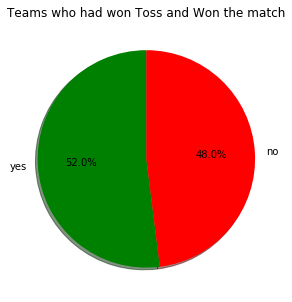

In [78]:
plt.pie([count1,count2],labels=["yes","no"],startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%',colors=['g','r'])
plt.title("Teams who had won Toss and Won the match")
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.show()


### The probability of winning when the team had won the toss is 52%. So winning toss gives a slight edge over the opponent. However, it would be naive to term winning the toss as a greater advantage as there were 363 instances when the team losing the toss has won the game.

In [79]:
#matches win when field
field_wins = matches["win_by_runs"].value_counts()
count1=0
for i in field_wins.iteritems():
    if i[0] != 0:
        count1 += i[1]
count2 = 756 - count1
print(count1,count2)

337 419


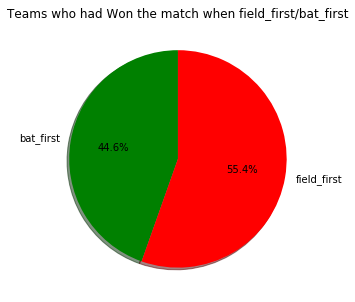

In [80]:
plt.pie([count1,count2],labels=["bat_first","field_first"],startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%',colors=['g','r'])
plt.title("Teams who had Won the match when field_first/bat_first")
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.show()


### Of the 756 IPL matches played from 2008 to 2019, 419 matches were won chasing the target. Hence, more victories were registered by teams chasing a total(field_first) than defending the total(bat_first).

# Player of the Match statistics

### For all seasons:

In [81]:
player_of_match = pd.DataFrame([])
for i in matches["player_of_match"].value_counts().iteritems():
    temp_df = pd.DataFrame({"player":[i[0]],"wins":[i[1]]})
    player_of_match = player_of_match.append(temp_df,ignore_index = True)
player_of_match.head(10)

,player,wins
0,CH Gayle,21
1,AB de Villiers,20
2,MS Dhoni,17
3,RG Sharma,17
4,DA Warner,17
5,YK Pathan,16
6,SR Watson,15
7,SK Raina,14
8,G Gambhir,13
9,V Kohli,12


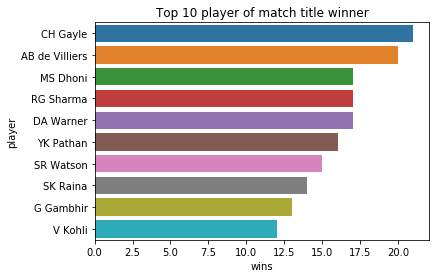

In [82]:
plt.title("Top 10 player of match title winner")
sns.barplot(x = "wins",y = "player",data = player_of_match.head(10))

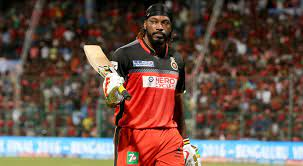

- **CH Gayle** is the player who won the most player of the match awards and hence is the most valuable player.
- Six Indian players have figured in the top ten IPL players list.
- Chris Gayle and AB de Villers have never won an IPL. Of the top ten players, 6 players(RG Sharma, MS Dhoni, DA Warner, SR Watson, SK Raina, and G Gambhir) have won the IPL. It exemplifies the importance of the presence of the most valuable player(s) in a team.

# Player Statistics

In [83]:
#load the Delivery.csv file
delivery = pd.read_csv("deliveries.csv")

In [84]:
# check the columsn and first 5 elements
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [85]:
#find out the shape of the data
delivery.shape

(179078, 21)

In [86]:
# get the columns of the data
delivery.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [87]:
#check of the null values and data types
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

### From the observations till now we can understand the following things:
- **match_id** - id of match
- **inning** - 1st or 2nd
- **batting_team** - batting team
- **bowling_team** - bowling team
- **over** - over in the innings
- **ball** - ball number in the over
- **batsman** - name of batsman on strike
- **non_striker** - name of batsman at non-striker end
- **bowler** - name of bowler
- **is_super_over** - binary value 0 or 1(yes/no)
- **wide_runs** - how many runs consided by wide
- **bye_runs** - bye runs
- **legbye_runs** - leg bye runs
- **noball_runs** - no ball runs
- **penalty_runs** - penalty runs
- **batsman_runs** - batsman runs
- **total_runs** - total runs for the ball
- **player_dismissed** - name of the batsman dismissed
- **dismissal_kind** - how the bastman is dismissed(LBW/Hitwicket/runout ..etc)
- **fielder** - name of the fielder who catched the ball

# Batsman Pefrformance

In [88]:
#runs by each batsman
batsman_run = delivery.groupby("batsman")["batsman_runs"].sum()
batsman_run_df = pd.DataFrame(columns = ["batsman","batsman_runs"])
for i in batsman_run.iteritems():
    temp_df = pd.DataFrame({"batsman":[i[0]],"batsman_runs":[i[1]]})
    batsman_run_df = batsman_run_df.append(temp_df,ignore_index = True)

In [89]:
# balls played by each batsman
balls = []
for j in batsman_run_df["batsman"]:
    balls.append(delivery[delivery.batsman == j].groupby("batsman")["ball"].count()[0])
batsman_run_df["balls"] = balls

In [90]:
#total matches payed by each batsman
matches_played = []
for i in batsman_run_df["batsman"]:
    matches_played.append((delivery[delivery.batsman == i].groupby("match_id")["match_id"].count()).size)
batsman_run_df["matches"] = matches_played

In [91]:
#Strike rate
batsman_run_df["strike_rate"] = (batsman_run_df["batsman_runs"] / batsman_run_df["balls"])*100

In [92]:
#average
batsman_run_df["average"] = batsman_run_df["batsman_runs"] / batsman_run_df["matches"]

# So the batsman summary is given as:

In [93]:
batsman_run_df = batsman_run_df.sort_values("batsman_runs",ascending = False).reset_index(drop = True)
batsman_run_df.head(20).style

,batsman,batsman_runs,balls,matches,strike_rate,average
0,V Kohli,5434,4211,169,129.042983,32.153846
1,SK Raina,5415,4044,189,133.902077,28.650794
2,RG Sharma,4914,3816,182,128.773585,27.000000
3,DA Warner,4741,3398,126,139.523249,37.626984
4,S Dhawan,4632,3776,158,122.669492,29.316456
5,CH Gayle,4560,3131,124,145.640370,36.774194
6,MS Dhoni,4477,3318,170,134.930681,26.335294
7,RV Uthappa,4446,3492,170,127.319588,26.152941
8,AB de Villiers,4428,2977,142,148.740343,31.183099
9,G Gambhir,4223,3524,151,119.835414,27.966887


# Top 10 batsman with Highest runs

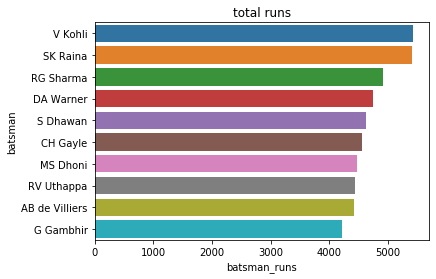

In [94]:
#total runs of top 119 batmsn
plt.title("total runs")
sns.barplot("batsman_runs","batsman",data = batsman_run_df.head(10))

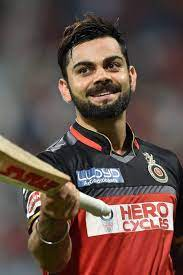
- **V Kohli** is a batsman to score most number of runs.

# Top 10 batsman with highest strike rate

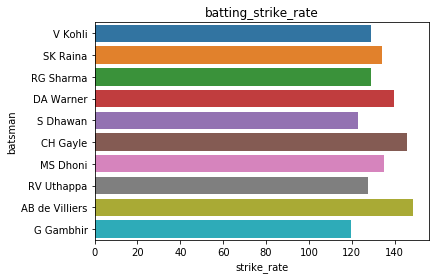

In [95]:
plt.title("batting_strike_rate")
sns.barplot("strike_rate","batsman",data = batsman_run_df.head(10))

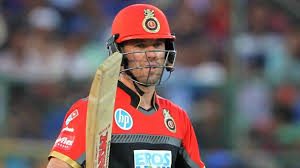
- **AB de Villiers** is the batsman with highest strike rate.

# Top 10 batsman with highest batting average:

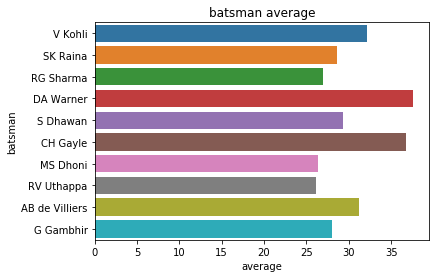

In [96]:
#batting averge
plt.title("batsman average")
sns.barplot("average","batsman",data = batsman_run_df.head(10))

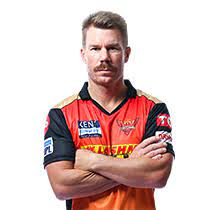
- **DA Warners** is the batsman to have highest batting average.

### Top 5 players in terms of runs
- V Kohli, Sk Raina, RG Sharma,DA Warner, S Dhawan

### Top 5 Players in terms of strike rate
- AB De Villiers, CH Gayle, YK Pathan, DA Warner, SR Watson

### Top 5 players in terms of average
- DA Warner, CH Gayle,V Kohli, AB de Villiers,SK Raina

### Top 5 Players to win maximum Player of Match
- CH Gayle, AB de Villiers, RG Sharma, DA Warner,MS Dhoni

# Bowler Performance

In [97]:
#bowler
bowler_summary = pd.DataFrame(columns = ["bowler"])
for i in delivery["bowler"].unique():
    temp_df = pd.DataFrame({"bowler": [i]})
    bowler_summary = bowler_summary.append(temp_df,ignore_index = True)

#total balls 
balls = []
for i in bowler_summary["bowler"]:
    temp = delivery[delivery.bowler == i].groupby("bowler")["ball"].count()[0]
    balls.append(temp)
bowler_summary["balls"] = balls

#total wickets
wickets = []
for i in bowler_summary["bowler"]:
    temp = delivery[delivery.bowler==i].groupby("bowler")["player_dismissed"].count()[0]
    wickets.append(temp)
bowler_summary["wickets"] = wickets

#total Runs
runs = []
for i in bowler_summary["bowler"]:
    temp = delivery[delivery.bowler==i].groupby("bowler")["total_runs"].sum()[0]
    runs.append(temp)
bowler_summary["runs"] = runs

#total bowled


#economy
bowler_summary["economy"] = bowler_summary["runs"]/(bowler_summary["balls"]/6)

# Bowlers Summary given as Follows:

In [98]:
bowler_summary = bowler_summary.sort_values("wickets",ignore_index = True,ascending =False)
bowler_summary.head(20).style

,bowler,balls,wickets,runs,economy
0,SL Malinga,2974,188,3511,7.083389
1,DJ Bravo,2711,168,3733,8.261896
2,A Mishra,3172,165,3850,7.282472
3,Harbhajan Singh,3451,161,4050,7.041437
4,PP Chawla,3157,156,4153,7.892936
5,B Kumar,2707,141,3264,7.234577
6,R Ashwin,3016,138,3391,6.746021
7,SP Narine,2600,137,2939,6.782308
8,UT Yadav,2605,136,3640,8.383877
9,R Vinay Kumar,2186,127,3043,8.352242


# Top 10 Bowlers with highest number of wickets:

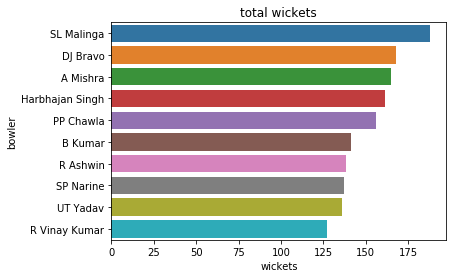

In [99]:
plt.title("total wickets")
sns.barplot(y = "bowler",x = "wickets",data =bowler_summary.head(10) )

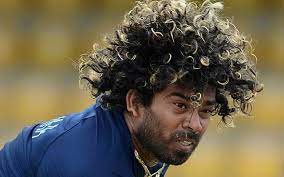
- **SL Malinga** have the honour to take most number of wickets.

# Top 10 Bowlers with lowest economy

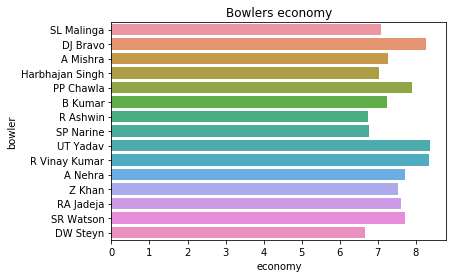

In [100]:
plt.title("Bowlers economy")
sns.barplot(x = "economy",y = "bowler",data = bowler_summary.head(15))

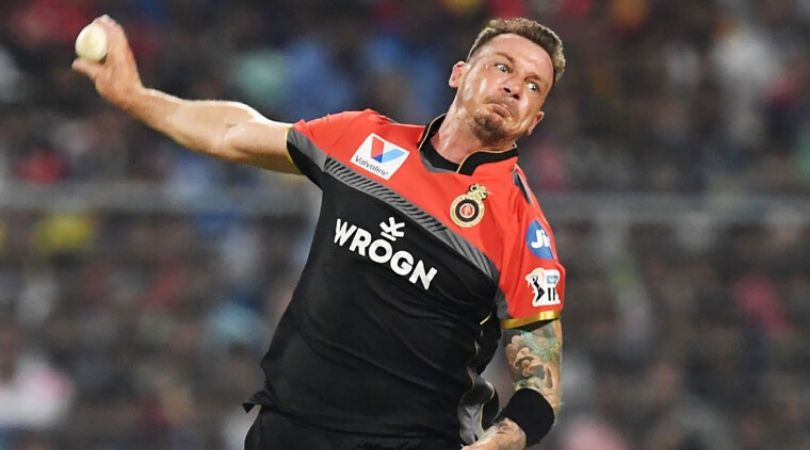
- **DW Steyn** have the lowest economy.

### Top 5 Bowlers in terms of wicket
- SL Malinga, DJ Bravo, A Mishra, Harbhajan Singh, PP Chawala

### Top 5 Bowlers in terms of Economy(lowest)
- AW Styne, R Ashwin, SP Narine, PP Chawla, SL malinga

## Runs Scored by top 10 players per season

In [101]:
Seasonal_runs_players = pd.DataFrame(columns=["batsman"])
Seasonal_runs_players["batsman"] = batsman_run_df.head(10)["batsman"]

for i in matches["season"].unique():
    temp = []
    #print(i)
    dict = {}
    for n in batsman_run_df.head(10)["batsman"]:
        dict[n] = 0
    for j in matches[matches.season == i]["id"]:
        temp.append(j)
    for k in temp:
        temp1 = {}
        for l in delivery[delivery.match_id == k].groupby("batsman")["batsman_runs"]:
            temp1[l[0]] = l[1].sum()
        for m in temp1:
            try:
                dict[m] += temp1[m]
            except KeyError:
                True
    Seasonal_runs_players[str(i)] = dict.values()

#average runs
Seasonal_runs_players["average_runs"] = batsman_run_df.head(10)["batsman_runs"]/12
    
Seasonal_runs_players.style

,batsman,2017,2008,2009,2010,2011,2012,2013,2014,2015,2016,2018,2019,average_runs
0,V Kohli,308,165,246,307,557,364,639,359,505,973,539,472,452.833333
1,SK Raina,442,421,434,528,438,441,548,523,374,399,466,401,451.250000
2,RG Sharma,333,404,362,404,372,433,538,390,482,489,297,410,409.500000
3,DA Warner,641,0,163,282,324,256,410,528,562,848,0,727,395.083333
4,S Dhawan,479,340,40,191,400,569,311,377,353,501,529,542,386.000000
5,CH Gayle,200,0,184,292,608,733,720,196,491,227,386,523,380.000000
6,MS Dhoni,290,414,332,287,392,357,461,371,372,284,481,436,373.083333
7,RV Uthappa,388,320,175,374,264,405,434,660,364,394,366,302,370.500000
8,AB de Villiers,216,95,465,111,312,319,373,395,513,687,488,454,369.000000
9,G Gambhir,498,534,286,277,378,590,406,335,327,501,91,0,351.916667


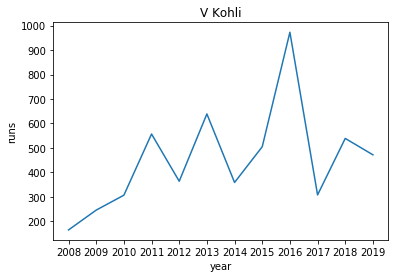

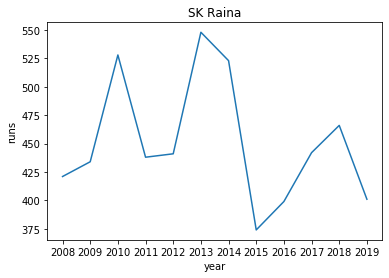

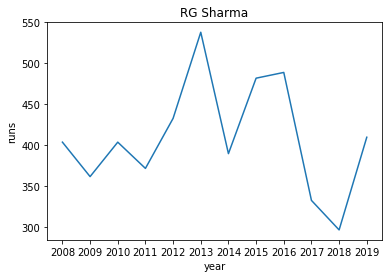

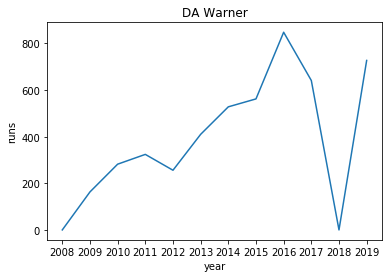

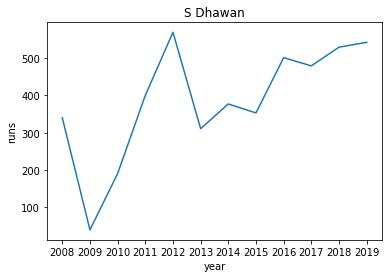

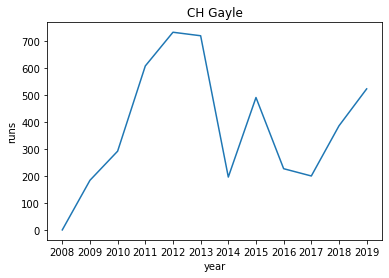

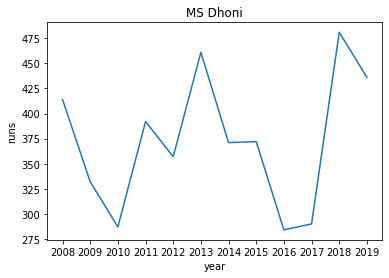

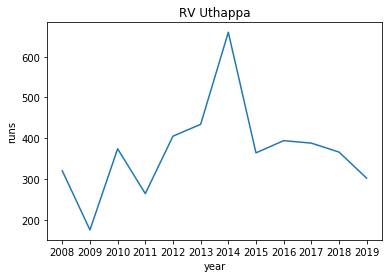

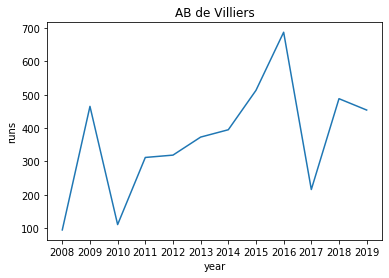

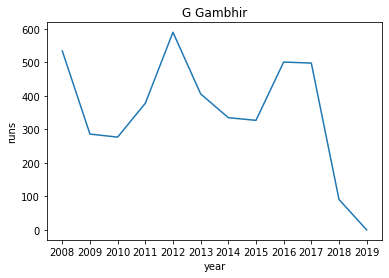

In [119]:
year = []
for i in Seasonal_runs_players.iteritems():
    year.append(i[0])
Year = year[1:13]
for i in range(0,10):
    runs = []
    for j in Seasonal_runs_players.iteritems():
        runs.append(j[1][i])
    Runs = runs[1:13]
    plt.title(str(runs[0]))
    sns.lineplot(x = Year, y =Runs)
    #print(Year[1:13])
    #print(Runs)
    plt.xlabel("year")
    plt.ylabel("runs")
    plt.show()

### From the above graphs we can see how the runs scored per season fluctuates for all the players.

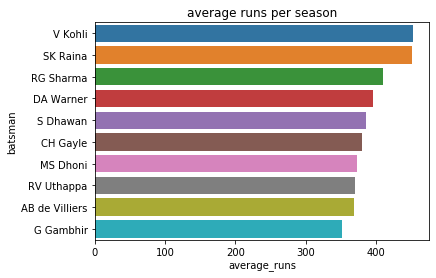

In [103]:
#average runs per season
plt.title("average runs per season")
sns.barplot(y="batsman",x="average_runs",data = Seasonal_runs_players)

In [104]:
Seasonal_runs_teams = pd.DataFrame(columns=[])
Seasonal_runs_teams["team"] = delivery["batting_team"].unique()
for i in matches["season"].unique():
    temp = []
    #print(i)
    dict = {}
    for n in delivery["batting_team"].unique():
        dict[n] = 0
    for j in matches[matches.season == i]["id"]:
        temp.append(j)
    for k in temp:
        temp1 = {}
        for l in delivery[delivery.match_id == k].groupby("batting_team")["batsman_runs"]:
            temp1[l[0]] = l[1].sum()
        for m in temp1:
            try:
                dict[m] += temp1[m]
            except KeyError:
                True
    Seasonal_runs_teams[str(i)] = dict.values()

Seasonal_runs_teams.style

,team,2017,2008,2009,2010,2011,2012,2013,2014,2015,2016,2018,2019
0,Sunrisers Hyderabad,2262,0,0,0,0,0,2197,1943,2117,2549,2721,2461
1,Royal Challengers Bangalore,1760,1865,2166,2272,2325,2351,2460,1992,2190,2863,2322,2209
2,Mumbai Indians,2633,1897,1766,2553,2143,2333,2845,2235,2611,2092,2380,2676
3,Rising Pune Supergiant,2370,0,0,0,0,0,0,0,0,0,0,0
4,Gujarat Lions,2311,0,0,0,0,0,0,0,0,2318,0,0
5,Kolkata Knight Riders,2354,1801,1678,1978,1905,2356,2134,2382,1939,2133,2759,2476
6,Kings XI Punjab,2099,2340,1768,2165,2080,2286,2312,2824,1902,2051,2210,2431
7,Delhi Daredevils,2131,2000,2021,2028,1942,2502,2114,1978,2061,1995,2343,0
8,Chennai Super Kings,0,2365,2084,2442,2461,2716,2671,2519,2564,0,2809,2473
9,Rajasthan Royals,0,2424,1610,2072,1601,2393,2571,2070,2043,0,2362,2195


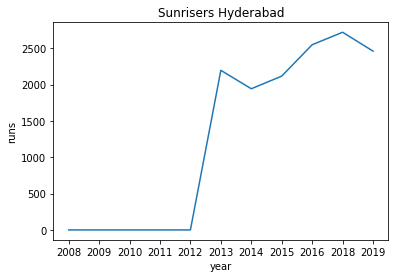

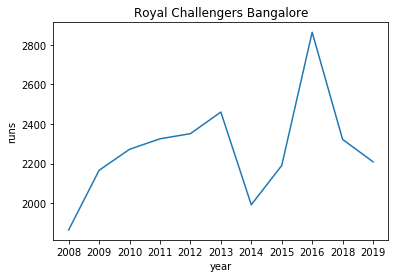

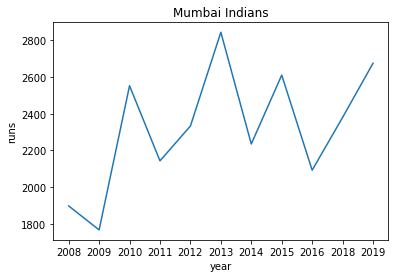

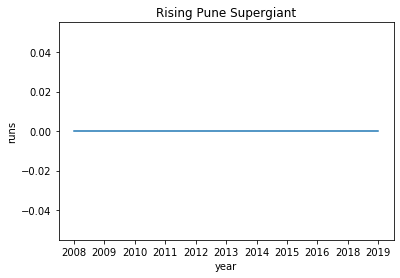

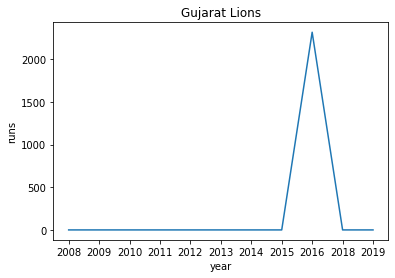

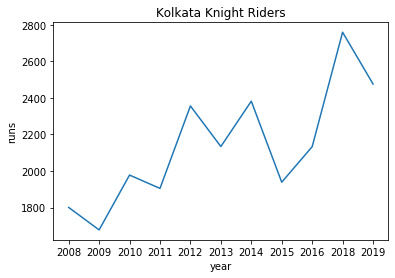

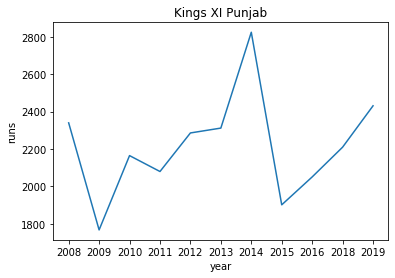

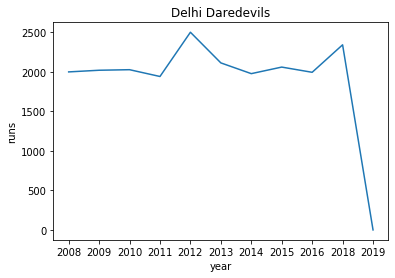

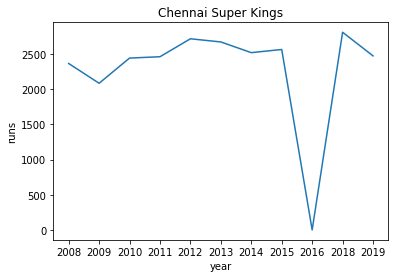

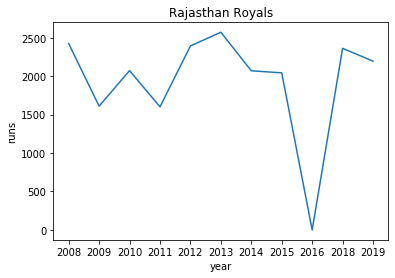

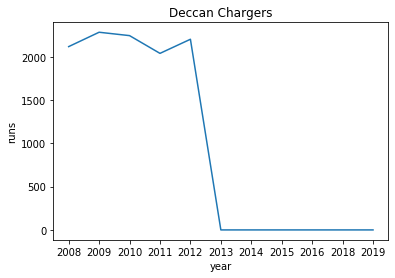

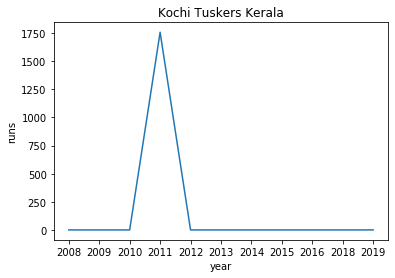

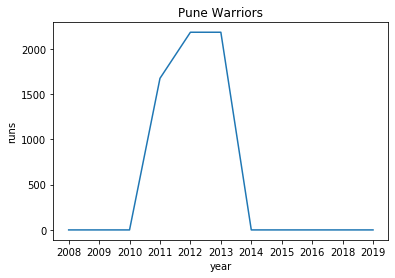

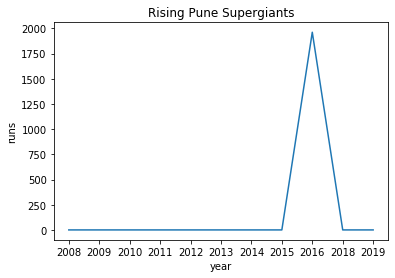

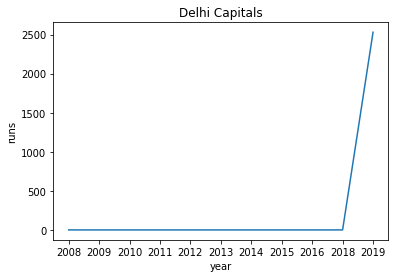

In [105]:
year = []
for i in Seasonal_runs_teams.iteritems():
    year.append(i[0])
Year = year[2:]
for i in range(0,15):
    runs = []
    for j in Seasonal_runs_teams.iteritems():
        runs.append(j[1][i])
    Runs = runs[2:]
    plt.title(str(runs[0]))
    sns.lineplot(x = Year, y =Runs)
    plt.xlabel("year")
    plt.ylabel("runs")
    plt.show()

# Inferences and Conclusion
### Let’s summarize the important observations we made during Exploratory Data Analysis:

- Mumbai Indians is the most successful team in IPL.
- Mumbai Indians has won the most number of toss.
- There were more matches won by chasing the total(419 matches) than defending(350 matches).
- The Mumbai city has hosted the most number of IPL matches.
- Chris Gayle has won the maximum number of player of the match title.
- Winning toss gives a slight edge(52%) probability of winning) against the opponents.
- Five Indian players have figured in the top ten IPL players list.
- Eden Gardens has hosted the maximum number of IPL matches.
- Till 2019, 40 venues have hosted 756 IPL matches.


### Best Batsman for endorsement
- **V Kohli**
- **SK Raina**
- **CH Gayle**
- **AB di Villiers**
- **RG Sharma**

## Best Bowler for endorsement
- **SL Malinga**
- **DJ Bravo**
- **R Ashwin**

## Best Teams for endorsement
- **Mumbai Indians**
- **Chennai Super Kings**
- **Kolkata Knight Riders**

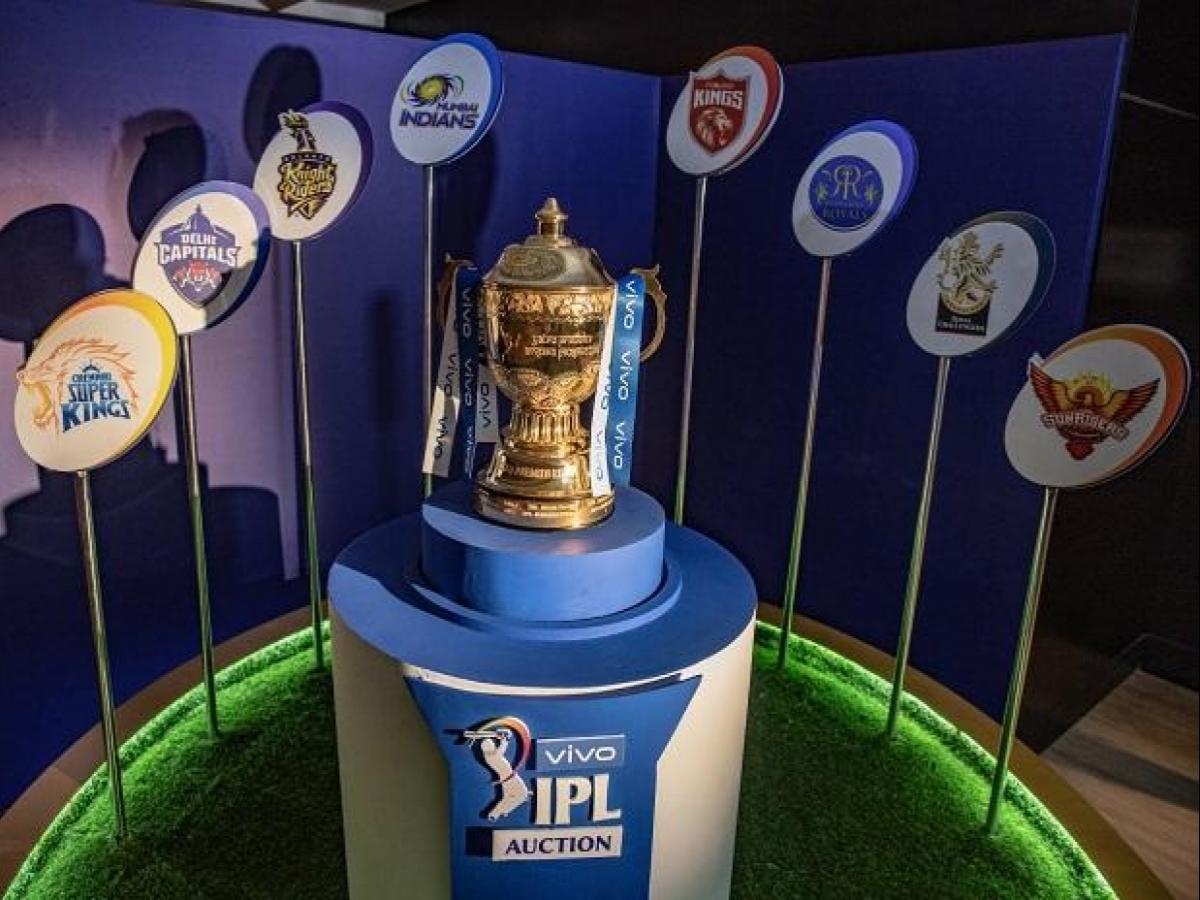